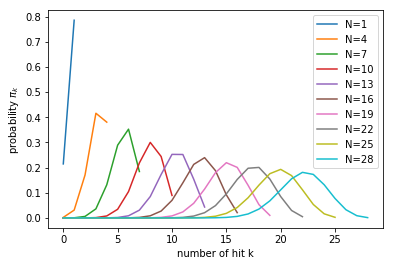

In [102]:

#%%pixie_debugger

import math,pandas as pd,matplotlib.pyplot as plt, pylab



# Algorithm 1.25 from Krauth
def binomial_convolution(theta,pi):
    def calculate_row(pi):
        return [theta*x + (1-theta)*y for (x,y) in zip(pi[:-1],pi[1:])]
    return calculate_row([0]+pi+[0])
    

if __name__=="__main__":
    pi=[1]
    theta=math.pi/4  ###########
    Pi=[]
    for i in range(0,30):
        pi=binomial_convolution(theta,pi)
        Pi.append(pi)
  
        if i%3==0:
           plt.plot(pi,label = "N="+str(i+1))
    plt.xlabel("number of hit k")
    plt.ylabel("probability $\pi_k$")
    plt.legend(loc="upper right")
    plt.show()
    

In [104]:
pd.DataFrame(Pi[:10])

0         1         2         3         4         5         6   \
0  2.146018e-01  0.785398       NaN       NaN       NaN       NaN       NaN   
1  4.605395e-02  0.337096  0.616850       NaN       NaN       NaN       NaN   
2  9.883262e-03  0.108512  0.397132  0.484473       NaN       NaN       NaN   
3  2.120966e-03  0.031049  0.170450  0.415875  0.380504       NaN       NaN   
4  4.551632e-04  0.008329  0.060965  0.223119  0.408285  0.298847       NaN   
5  9.767887e-05  0.002145  0.019625  0.095763  0.262856  0.384799  0.234714   
6  2.096206e-05  0.000537  0.005896  0.035964  0.131622  0.289025  0.352591   
7  4.498497e-06  0.000132  0.001687  0.012349  0.056493  0.165401  0.302666   
8  9.653858e-07  0.000032  0.000465  0.003975  0.021822  0.079864  0.194858   
9  2.071736e-07  0.000008  0.000125  0.001219  0.007805  0.034278  0.104542   

         7         8         9        10  
0       NaN       NaN       NaN      NaN  
1       NaN       NaN       NaN      NaN  
2       NaN       NaN       NaN      NaN  
3       NaN       NaN       NaN      NaN  
4       NaN       NaN       NaN      NaN  
5       NaN       NaN       NaN      NaN  
6  0.184344       NaN       NaN      NaN  
7  0.316485  0.144783       NaN      NaN  
8  0.305632  0.279637  0.113713      NaN  
9  0.218630  0.300053  0.244030  0.08931

In [55]:

print(Pi[2][0])

0.009883261882225127


In [56]:
pd.DataFrame([0]+Pi[2]+[0])

0
0  0.000000
1  0.009883
2  0.108512
3  0.397132
4  0.484473
5  0.000000

In [59]:
pd.DataFrame([Pi[2][0:-1],Pi[2][1:]],index=["x","y"])

0         1         2
x  0.009883  0.108512  0.397132
y  0.108512  0.397132  0.484473

In [105]:
hit=list(filter(lambda x:x%3==1,range(30)))
pd.DataFrame(hit)

0
0   1
1   4
2   7
3  10
4  13
5  16
6  19
7  22
8  25
9  28

In [91]:
hit2=list(map(lambda x:(x)*3+1,range(9)))
pd.DataFrame(hit2)

0
0   1
1   4
2   7
3  10
4  13
5  16
6  19
7  22
8  25

In [109]:
print([1],[])

[1] []


In [110]:
Pi[5]

[9.767886543264415e-05,
 0.0021449061963703534,
 0.01962477830990114,
 0.09576348513254157,
 0.2628558538955999,
 0.3847991390124336,
 0.23471415858772074]

In [122]:
pd.DataFrame(list(map(lambda x:x*Pi[5][x],range(len(Pi[5])))))

0
0  0.000000
1  0.002145
2  0.039250
3  0.287290
4  1.051423
5  1.923996
6  1.408285

In [141]:
#mean of number of hit k
#mean=[sum(list(map(lambda x:x*Pi[i][x],range(len(Pi[i]))))) for i in range(0,30)]
#pd.DataFrame(mean[0:30:3],index=range(1,31,3))

#mean[5]

0
1    0.785398
4    3.141593
7    5.497787
10   7.853982
13  10.210176
16  12.566371
19  14.922565
22  17.278760
25  19.634954
28  21.991149

In [181]:
from numpy import * 
import scipy.linalg
#
nPi=asarray(Pi)
#nPi[:10]
pd.DataFrame(nPi[0:10])
#nPi[0]
#arange(5)
#pd.DataFrame(asarray(mean))
#mean2=array([sum(list(map(lambda x:(x**2*Pi[i][x],range(len(Pi[i]))))) for i in range(30)])
#var=
#print(mean_k.dtype)
#pd.DataFrame(mean)


0
0          [0.21460183660255172, 0.7853981633974483]
1  [0.04605394827318831, 0.3370957766587268, 0.61...
2  [0.009883261882225127, 0.10851205917288954, 0....
3  [0.0021209661515495045, 0.03104918292270249, 0...
4  [0.0004551632314943697, 0.008329014600275674, ...
5  [9.767886543264415e-05, 0.0021449061963703534,...
6  [2.0962063919098937e-05, 0.0005370176105948166...
7  [4.498497416018715e-06, 0.00013170853202464178...
8  [9.653858074294495e-07, 3.179800447730339e-05,...
9  [2.071735673043972e-07, 7.582122401250522e-06,...

In [211]:
meank2=zeros((1,30))
meank2.shape
arange(3)*arange(3)

array([0, 1, 4])

# Mean(N_hit)

In [220]:
meank=zeros((1,30))
meank.shape
arange(1).shape
arange(2).shape
asarray(nPi[0]).shape
for i in range(30):
    meank[0][i]=(arange(i+2).dot(asarray(nPi[i])).T)
    
pd.DataFrame(meank)
    

0         1         2         3         4         5         6   \
0  0.785398  1.570796  2.356194  3.141593  3.926991  4.712389  5.497787   

         7         8         9     ...             20        21         22  \
0  6.283185  7.068583  7.853982    ...      16.493361  17.27876  18.064158   

          23         24         25        26         27         28         29  
0  18.849556  19.634954  20.420352  21.20575  21.991149  22.776547  23.561945  

[1 rows x 30 columns]

# Var(N_hit)

In [219]:
for i in range(30):
    temp=arange(i+2)**2
    meank2[0][i]=(temp.dot(asarray(nPi[i])).T)

vark=meank2-meank**2
vark.shape

rmsk=sqrt(meank2-meank**2)
pd.DataFrame(rmsk)

0         1         2         3         4         5         6   \
0  0.410546  0.580599  0.711086  0.821092  0.918008  1.005628  1.086202   

         7         8        9     ...           20        21        22  \
0  1.161199  1.231638  1.29826    ...     1.881357  1.925631  1.968909   

         23        24        25        26        27        28        29  
0  2.011256  2.052729  2.093381  2.133259  2.172404  2.210857  2.248652  

[1 rows x 30 columns]